In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
# data read
data1 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/서울 자전거 개수.xlsx')
data2 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/서울 자전거 개수2019.xlsx')
data3 = pd.read_excel('/content/drive/MyDrive/kaggle/교통빅데이터/자전거 입대수.xlsx')

In [5]:
data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)
data3 = pd.DataFrame(data3)
data1

,구 분,대여소(개소),거치대(개)
0,소 계,1148,14125
1,종로구,105,1216
2,중 구,88,1090
3,용산구,83,1003
4,성동구,86,1026
5,광진구,87,1136
6,동대문구,83,1031
7,중랑구,70,830
8,성북구,75,931
9,강북구,59,676


In [6]:
data3

,년,입대수(누적),회원가입(명),이용실적(건)
0,2015.0,5600,34162,113708
1,2016.0,20000,177180,1611631
2,2017.0,25000,386607,5031039
3,2018.0,29500,495631,10061684
4,2019.0,25000,636274,19074794
5,2020.0,37500,1055725,23705176
6,2021.1,37500,12956,812021


In [7]:
data1_강북 = data1.iloc[2:15,:3]
data1_강북

,구 분,대여소(개소),거치대(개)
2,중 구,88,1090
3,용산구,83,1003
4,성동구,86,1026
5,광진구,87,1136
6,동대문구,83,1031
7,중랑구,70,830
8,성북구,75,931
9,강북구,59,676
10,도봉구,56,673
11,노원구,90,1171


In [8]:
data1_강남 = data1.iloc[17:, :]
data1_강남

,구 분,대여소(개소),거치대(개)
17,양천구,81,1028
18,강서구,151,2020
19,구로구,91,1184
20,금천구,55,717
21,영등포구,107,1485
22,동작구,63,853
23,관악구,66,828
24,서초구,123,1641
25,강남구,119,1487
26,송파구,136,1800


In [9]:
data2

,구분,대여소(개소),거치대(개)
0,소 계,766,9621
1,강 북 구,39,451
2,광 진 구,59,841
3,노 원 구,68,879
4,도 봉 구,33,396
5,동대문구,51,659
6,마 포 구,79,1075
7,서대문구,51,667
8,성 동 구,63,780
9,성 북 구,58,726


In [10]:
data2_강북 = data2.iloc[1:15,:]
data2_강남 = data2.iloc[17:, :]
data2_강북

,구분,대여소(개소),거치대(개)
1,강 북 구,39,451
2,광 진 구,59,841
3,노 원 구,68,879
4,도 봉 구,33,396
5,동대문구,51,659
6,마 포 구,79,1075
7,서대문구,51,667
8,성 동 구,63,780
9,성 북 구,58,726
10,용 산 구,39,538


In [11]:
data2_강남

,구분,대여소(개소),거치대(개)
17,강 남 구,99,1218
18,강 동 구,57,763
19,강 서 구,85,1002
20,관 악 구,51,640
21,구 로 구,64,788
22,금 천 구,45,560
23,동 작 구,41,501
24,서 초 구,89,1227
25,송 파 구,99,1298
26,양 천 구,55,677


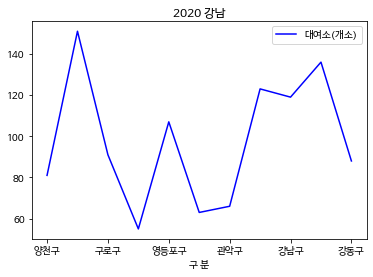

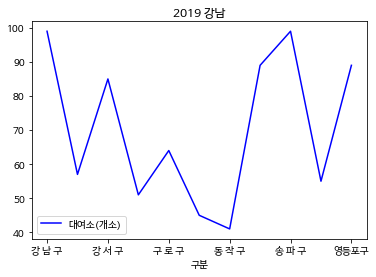

In [12]:
data1_강남.plot(x = '구 분', y ='대여소(개소)',color= 'blue', title = '2020 강남')
data2_강남.plot(x = '구분', y ='대여소(개소)',color= 'blue',title = '2019 강남')

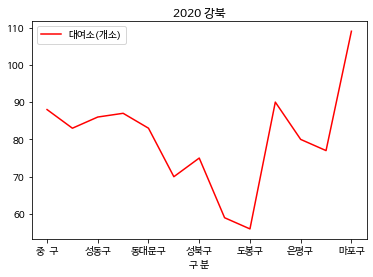

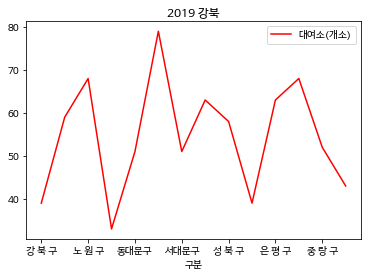

In [13]:
data1_강북.plot(x = '구 분', y ='대여소(개소)',color= 'red', title = '2020 강북')
data2_강북.plot(x = '구분', y ='대여소(개소)',color= 'red', title = '2019 강북')

In [ ]:
data3

,년,입대수(누적),회원가입(명),이용실적(건)
0,2015.0,5600,34162,113708
1,2016.0,20000,177180,1611631
2,2017.0,25000,386607,5031039
3,2018.0,29500,495631,10061684
4,2019.0,25000,636274,19074794
5,2020.0,37500,1055725,23705176
6,2021.1,37500,12956,812021


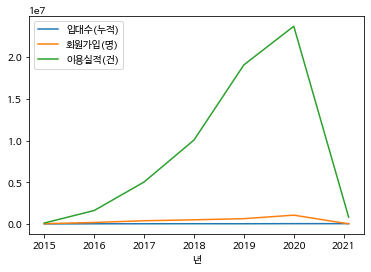

In [ ]:
data3.plot(x = '년', y = ['입대수(누적)','회원가입(명)', '이용실적(건)'])

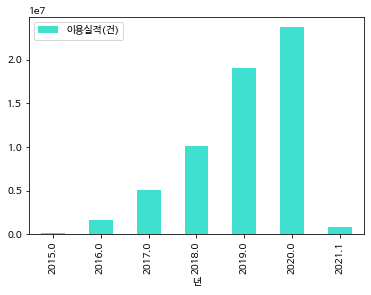

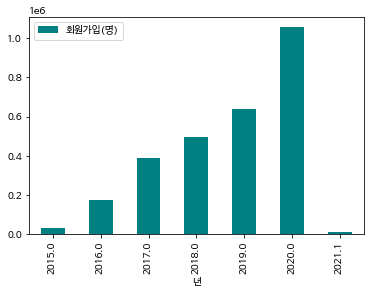

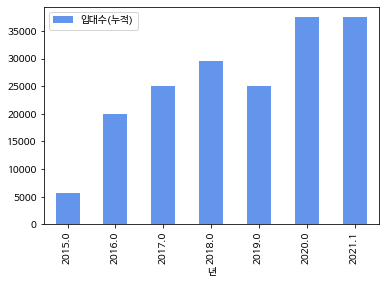

In [ ]:
data3.plot(kind = 'bar', x = '년', y = ['이용실적(건)'], color = 'turquoise')
data3.plot(kind = 'bar', x = '년', y = ['회원가입(명)'], color = 'teal')
data3.plot(kind = 'bar', x = '년', y = ['입대수(누적)'], color = 'cornflowerblue')

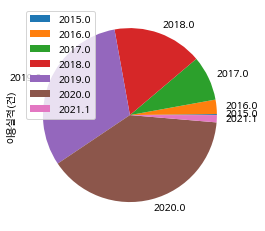

In [ ]:
data3.plot(kind= 'pie',y = '이용실적(건)', x = '년')

In [ ]:
data3

,입대수(누적),회원가입(명),이용실적(건)
년,,,
2015.0,5600,34162,113708
2016.0,20000,177180,1611631
2017.0,25000,386607,5031039
2018.0,29500,495631,10061684
2019.0,25000,636274,19074794
2020.0,37500,1055725,23705176
2021.1,37500,12956,812021


KeyError: ignored